In [174]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [175]:
import cv2 as cv2
import skimage.morphology as morph

In [176]:
import os

# Vérifier si le dossier existe, sinon le créer
if not os.path.exists('data'):
    os.makedirs('data')

if not os.listdir('data'):
    %cd data
    !unzip -n ../meteor.zip
    %cd ..

data/meteor/20160811_000103_487_700_766_1250_1358.tif: (66, 108), float64, -25.0, 210.66666666666666


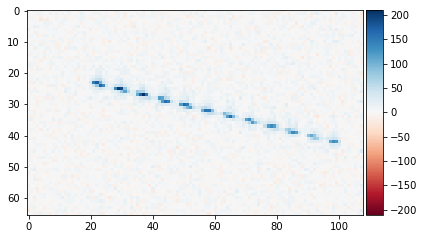

data/meteor/20140928_221255_358_501_572_731_789.tif: (71, 58), float64, -23.0, 48.888888888888886


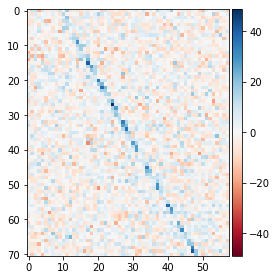

data/meteor/20141024_043613_079_302_410_683_835.tif: (108, 152), float64, -234.33333333333331, 362.6666666666667


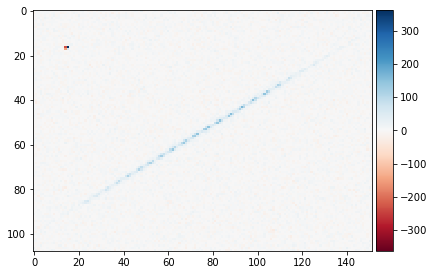

data/meteor/20160813_030839_167_594_677_684_791.tif: (83, 107), float64, -153.0, 122.33333333333331


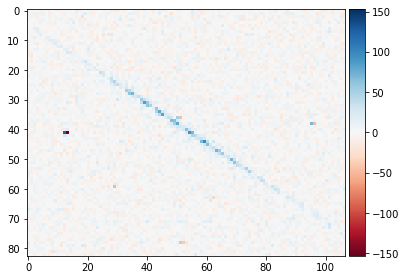

data/meteor/20170105_005741_194_112_210_335_640.tif: (98, 305), float64, -131.77777777777783, 301.0


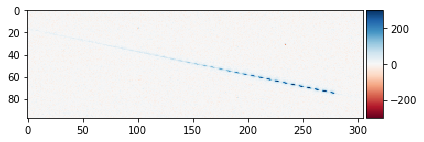

In [177]:
from skimage import io

folder_path = 'data/meteor'

i = 0
for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        file_path = os.path.join(folder_path, filename)
        
        image = io.imread(file_path)

        if (i < 5):
            print(f"{file_path}: {image.shape}, {image.dtype}, {image.min()}, {image.max()}")
            io.imshow(image)
            io.show()
            i += 1

In [178]:
path = "data/meteor/20201213_023323_359_305_525_0_73"

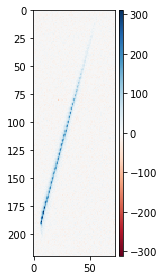

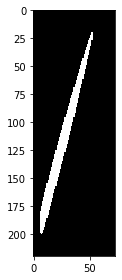

In [179]:
img = io.imread(path + ".tif")
io.imshow(img)
io.show()

mask = io.imread(path + "_mask.png")
io.imshow(mask)
io.show()

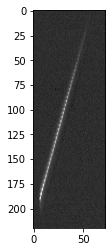

In [180]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.show()

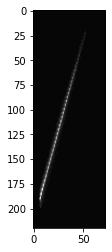

In [181]:
# Eliminer les valeurs via le masque
img[mask == 0] = 0

# Normaliser l'image dans la plage de 0 à 255
img = ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.show()

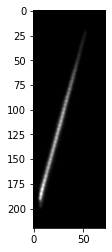

In [182]:
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

plt.imshow(img_blurred, cmap='gray')
plt.show()

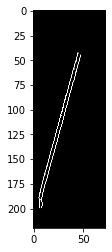

In [183]:
# Détection des contours à l'aide de l'algorithme de Canny
edges = cv2.Canny(img_blurred, 60, 150)

plt.imshow(edges, cmap='gray')
plt.show()

In [184]:
# Détection des lignes à l'aide de la transformée de Hough probabiliste
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180,
                        threshold=10)

print(lines)

[[[ 19 150  19 149]]

 [[ 21 143  21 142]]

 [[ 36  85  36  84]]

 [[ 41  56  42  51]]

 [[ 28 117  28 116]]

 [[ 19 148  20 144]]

 [[ 41  68  41  67]]

 [[ 21 130  21 128]]

 [[ 12 163  13 157]]

 [[ 23 135  24 130]]

 [[ 33  98  33  97]]

 [[ 29 113  32  99]]

 [[ 11 167  12 165]]

 [[ 15 165  16 158]]

 [[ 40  72  40  71]]

 [[ 19 136  19 135]]

 [[ 34  95  34  93]]

 [[ 25 114  25 113]]

 [[ 20 134  21 131]]

 [[ 42  64  44  56]]

 [[ 27 120  27 118]]

 [[  8 193   8 191]]

 [[ 17 145  17 143]]

 [[  9 186   9 184]]

 [[ 28 104  33  84]]

 [[  9 175   9 172]]

 [[ 16 149  16 146]]

 [[ 45  53  45  52]]

 [[ 35  79  35  77]]

 [[ 22 127  23 120]]

 [[  6 199   6 191]]

 [[ 24 129  24 129]]

 [[ 43  51  44  43]]

 [[ 12 175  12 173]]

 [[ 25 128  26 121]]

 [[ 37  83  37  81]]

 [[ 26 111  27 106]]

 [[ 36  75  36  74]]

 [[ 10 183  10 180]]

 [[ 39  64  39  62]]

 [[ 15 153  15 150]]

 [[  6 188   8 176]]

 [[ 38  80  38  77]]

 [[ 37  71  38  65]]

 [[ 14 169  14 166]]

 [[ 46  51

In [185]:
# Si des lignes ont été détectées
if lines is not None:
    l = len(lines)
    # Convertir les coordonnées des lignes en une représentation plus pratique
    lines = lines.squeeze()
    if l == 1:
        lines = np.array([lines])
    print(lines)

[[ 19 150  19 149]
 [ 21 143  21 142]
 [ 36  85  36  84]
 [ 41  56  42  51]
 [ 28 117  28 116]
 [ 19 148  20 144]
 [ 41  68  41  67]
 [ 21 130  21 128]
 [ 12 163  13 157]
 [ 23 135  24 130]
 [ 33  98  33  97]
 [ 29 113  32  99]
 [ 11 167  12 165]
 [ 15 165  16 158]
 [ 40  72  40  71]
 [ 19 136  19 135]
 [ 34  95  34  93]
 [ 25 114  25 113]
 [ 20 134  21 131]
 [ 42  64  44  56]
 [ 27 120  27 118]
 [  8 193   8 191]
 [ 17 145  17 143]
 [  9 186   9 184]
 [ 28 104  33  84]
 [  9 175   9 172]
 [ 16 149  16 146]
 [ 45  53  45  52]
 [ 35  79  35  77]
 [ 22 127  23 120]
 [  6 199   6 191]
 [ 24 129  24 129]
 [ 43  51  44  43]
 [ 12 175  12 173]
 [ 25 128  26 121]
 [ 37  83  37  81]
 [ 26 111  27 106]
 [ 36  75  36  74]
 [ 10 183  10 180]
 [ 39  64  39  62]
 [ 15 153  15 150]
 [  6 188   8 176]
 [ 38  80  38  77]
 [ 37  71  38  65]
 [ 14 169  14 166]
 [ 46  51  47  45]]


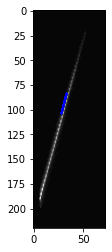

In [186]:
if lines is not None:
    # Sélectionner la ligne la plus longue
    longest_line = max(
        lines, key=lambda line: (line[2] - line[0])**2 + (line[3] - line[1])**2)

    # Dessiner la ligne détectée sur l'image originale (en rouge)
    x1, y1, x2, y2 = longest_line
    # Convertir en image couleur pour le dessin
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.line(img_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Afficher l'image avec la ligne détectée
    plt.imshow(img_color)
    plt.show()

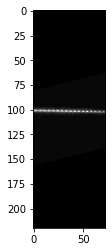

In [187]:
if lines is not None:
    dx = x2 - x1
    dy = y2 - y1
    angle_radians = np.arctan2(dy, dx)
    angle_degrees = np.degrees(angle_radians)
    
    rows, cols = img.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle_degrees, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    
    plt.imshow(rotated_img, cmap='gray')
    plt.show()

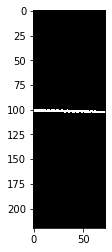

In [188]:
if lines is not None:
    bin_img = (rotated_img > 50).astype(np.uint8)
    
    plt.imshow(bin_img, cmap='gray')
    plt.show()

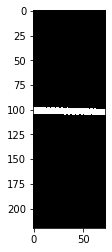

In [189]:
if lines is not None:
    kernel_size = 5
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    dilated_img = cv2.dilate(bin_img, kernel)

    # Afficher l'image dilatée
    plt.imshow(dilated_img, cmap='gray')
    plt.show()

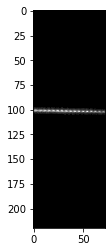

In [190]:
if lines is not None:
    num_labels, labels = cv2.connectedComponents(dilated_img)

    # Identifier la composante connexe la plus grande
    largest_component_label = np.argmax(np.bincount(labels.flat)[1:]) + 1

    # Créer une masque pour la composante la plus grande
    largest_component_mask = (
        labels == largest_component_label).astype(np.uint8) * 255

    # Appliquer la masque à l'image binaire pour ne garder que la composante la plus grande
    largest_component_image = cv2.bitwise_and(
        rotated_img, largest_component_mask)
    
    plt.imshow(largest_component_image, cmap='gray')
    plt.show()

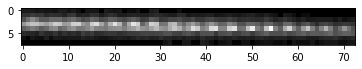

In [191]:
if lines is not None:
    x, y, w, h = cv2.boundingRect(largest_component_mask)

    # Recadrer l'image pour se concentrer sur la zone du masque
    cropped_image = largest_component_image[y:y+h, x:x+w]

    plt.imshow(cropped_image, cmap='gray')
    plt.show()

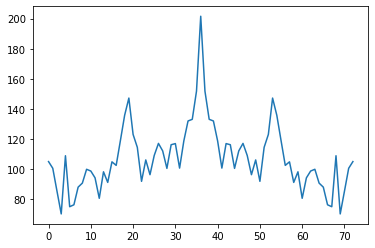

In [192]:
if lines is not None:
    dft = cv2.dft(np.float32(cropped_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft = np.fft.fftshift(dft)

    magnitude_spectral_full = 20 * np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))

    center_index = int(magnitude_spectral_full.shape[0] / 2)
    magnitude_1d = magnitude_spectral_full[center_index,:]
    plt.plot(magnitude_1d)
    plt.show()

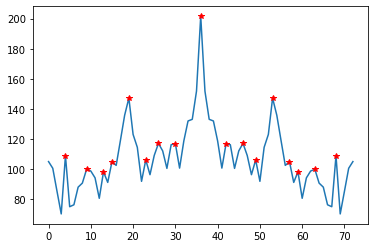

In [193]:
if lines is not None:
    magnitude_1d_begin = np.insert(magnitude_1d, 0, magnitude_1d[0]) # 0 begin
    magnitude_1d_end   = np.append(magnitude_1d, magnitude_1d[-1]) # 0 end

    derivate = magnitude_1d_end - magnitude_1d_begin
    supremums = np.all([derivate[:-1] > 0, derivate[1:] < 0], axis=0)

    x_supremums = np.where(supremums)[0]
    y_supremums = np.array(magnitude_1d[supremums])

    plt.plot(magnitude_1d)
    plt.plot(x_supremums, y_supremums, 'r*')
    plt.show()

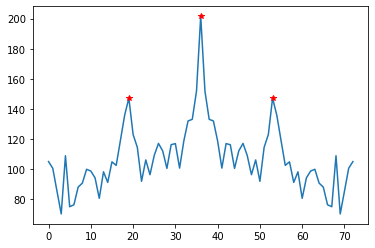

In [194]:
if lines is not None:
    indexes = np.flip(np.argsort(y_supremums))

    first_supremum = x_supremums[indexes[0]]
    second_supremum = x_supremums[indexes[1]]

    plt.plot(magnitude_1d)
    plt.plot(x_supremums[indexes[:3]], y_supremums[indexes[:3]], 'r*')
    plt.show()

In [195]:
dist_per_index = 42.42 # TODO

print(abs(first_supremum - second_supremum) * dist_per_index)

721.14
